In [1]:
import sys, os, time, json, pickle
from timeit import default_timer as timer
from humanfriendly import format_timespan
from glob import glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv('admin.env')

True

In [5]:
from mysql_connect import get_db_connection
db = get_db_connection('jp_autoreview')

In [6]:
start = timer()
df = db.read_sql(db.tables['pipeline_tests'].select())
print(format_timespan(timer()-start))

2.33 seconds


In [7]:
df.set_index('id', inplace=True)

In [8]:
top_results = df.sort_values('score_correctly_predicted', ascending=False).drop_duplicates(['review_paper_id', 'random_seed'])

In [9]:
def get_paper_info(datadir):
    g = glob(os.path.join(datadir, '..', '*paperinfo.json'))
    if len(g) != 1:
        raise RuntimeError("failed to find paper info")
    return pd.read_json(os.path.join(g[0]), typ='series')

In [10]:
start = timer()
data = []
for id, row in top_results.iterrows():
    this_row_data = get_paper_info(row.datadir)
    this_row_data['id'] = id
    data.append(this_row_data)
paperinfo = pd.DataFrame(data).set_index('id')
print(format_timespan(timer()-start))

10.16 seconds


In [11]:
top_results = top_results.join(paperinfo[['wos_title', 'mag_EF', 'doi', 'wos_title_source']])

In [12]:
top_results.drop_duplicates('review_paper_id')

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,wos_title,mag_EF,doi,wos_title_source
id,,,,,,,,,,,,,,,,,,,
2776,2018-05-25 15:16:21,783250631,2,data/review_783250631/seed_002,397,503,495,50,0.789264,225045,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,307,265,A Coffee Berry Borer (Coleoptera: Curculionida...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE
10671,2018-05-26 02:51:59,2156979070,4,data/review_2156979070/seed_004,878,1335,1327,50,0.657678,574294,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,2189,957,Pituitary Adenylate Cyclase-Activating Polypep...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS
21291,2018-05-28 02:44:38,2334595206,5,data/review_2334595206/seed_005,417,688,686,50,0.606105,217591,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,296,334,Meliaceous Limonoids: Chemistry and Biological...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS
34140,2018-05-29 21:05:00,2155071292,2,data/review_2155071292/seed_002,435,749,747,50,0.580774,851720,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,824,789,"Physiology, Signaling, and Pharmacology of Gal...",1.110000e-08,10.1124/pr.112.006536,PHARMACOLOGICAL REVIEWS
26460,2018-05-28 21:25:47,2026986848,2,data/review_2026986848/seed_002,15,26,20,50,0.576923,332244,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,720,471,Dye-Sensitized Solar Cells,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS
224,2018-05-25 09:00:05,1836476934,4,data/review_1836476934/seed_004,1912,3399,3396,50,0.562518,184788,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,79,37,Molecular imprinting science and technology: a...,2.810000e-08,10.1002/jmr.2347,JOURNAL OF MOLECULAR RECOGNITION
24702,2018-05-28 14:57:55,2050005607,1,data/review_2050005607/seed_001,463,831,830,50,0.557160,180495,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,186,156,Polymer Brushes via Surface-Initiated Controll...,1.597000e-07,10.1021/cr900045a,CHEMICAL REVIEWS
21601,2018-05-28 03:35:27,2321077391,5,data/review_2321077391/seed_005,456,835,834,50,0.546108,211903,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,748,340,Photochromism of Diarylethene Molecules and Cr...,6.590000e-08,10.1021/cr500249p,CHEMICAL REVIEWS
11783,2018-05-25 15:07:04,2075035271,2,data/review_2075035271/seed_002,975,1801,1801,50,0.541366,846869,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,3233,1282,HMGB1 in health and disease,1.800000e-08,10.1016/j.mam.2014.05.001,MOLECULAR ASPECTS OF MEDICINE


In [13]:
wos_source = pd.read_table('data/wos_title_sources_subjects.tsv')

In [14]:
gb = wos_source.groupby('title_source')
wos_source['num_entries'] = wos_source.title_source.map(gb.title_source.count())

In [15]:
wos_source.sort_values(['num_entries', 'title_source'], ascending=[False, True])

,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
23655,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23656,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23657,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23658,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23659,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23660,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23661,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23662,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23663,ARTIFICIAL INTELLIGENCE IN EDUCATION,LECT NOTES ARTIF INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
73902,HIGH PERFORMANCE COMPUTING SYSTEMS AND APPLICA...,NaN,Computer Science,"Computer Science, Interdisciplinary Applicatio...",Science & Technology,Technology,9.0


In [16]:
wos_source.nunique()

title_source           164411
title_source_abbrev     31732
subject_extended        11638
subject_traditional     20956
heading                     3
subheading                  3
num_entries                 9
dtype: int64

In [17]:
wos_source[['title_source', 'heading', 'subheading', 'num_entries']].drop_duplicates()

,title_source,heading,subheading,num_entries
0,NaN,NaN,NaN,NaN
1,'92 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
2,'93 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
3,'94 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
4,'95 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
5,'95 QCD AND HIGH ENERGY HADRONIC INTERACTIONS,Science & Technology,Physical Sciences,1.0
6,"'96 CHINA-JAPAN SYMPOSIUM ON PARTICUOLOGY, PRO...",Science & Technology,Technology,1.0
7,'97 NANJING INTERNATIONAL SYMPOSIUM ON HIGH YI...,Science & Technology,Technology,1.0
8,'99 INTERNATIONAL CONFERENCE ON MANAGEMENT SCI...,Science & Technology,Technology,1.0
9,'ABBASID STUDIES,Arts & Humanities,NaN,1.0


In [18]:
top_results = top_results.merge(wos_source.drop_duplicates(subset=['title_source']), how='left', left_on='wos_title_source', right_on='title_source')

In [19]:
x = top_results.drop_duplicates('review_paper_id').dropna(subset=['heading']).reset_index()
x[x.heading=="Science & Technology"]

,index,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
0,0,2018-05-25 15:16:21,783250631,2,data/review_783250631/seed_002,397,503,495,50,0.789264,...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE,JOURNAL OF INSECT SCIENCE,J INSECT SCI,Entomology,Entomology,Science & Technology,Life Sciences & Biomedicine,1.0
1,5,2018-05-26 02:51:59,2156979070,4,data/review_2156979070/seed_004,878,1335,1327,50,0.657678,...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS,PHARMACOLOGICAL REVIEWS,PHARMACOL REV,Pharmacology & Pharmacy,Pharmacology & Pharmacy,Science & Technology,Life Sciences & Biomedicine,1.0
2,10,2018-05-28 02:44:38,2334595206,5,data/review_2334595206/seed_005,417,688,686,50,0.606105,...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
3,14,2018-05-29 21:05:00,2155071292,2,data/review_2155071292/seed_002,435,749,747,50,0.580774,...,1.110000e-08,10.1124/pr.112.006536,PHARMACOLOGICAL REVIEWS,PHARMACOLOGICAL REVIEWS,PHARMACOL REV,Pharmacology & Pharmacy,Pharmacology & Pharmacy,Science & Technology,Life Sciences & Biomedicine,1.0
4,15,2018-05-28 21:25:47,2026986848,2,data/review_2026986848/seed_002,15,26,20,50,0.576923,...,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
5,19,2018-05-25 09:00:05,1836476934,4,data/review_1836476934/seed_004,1912,3399,3396,50,0.562518,...,2.810000e-08,10.1002/jmr.2347,JOURNAL OF MOLECULAR RECOGNITION,JOURNAL OF MOLECULAR RECOGNITION,J MOL RECOGNIT,Biochemistry & Molecular Biology; Biophysics,Biochemistry & Molecular Biology; Biophysics,Science & Technology,Life Sciences & Biomedicine,1.0
6,22,2018-05-28 14:57:55,2050005607,1,data/review_2050005607/seed_001,463,831,830,50,0.557160,...,1.597000e-07,10.1021/cr900045a,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
7,26,2018-05-28 03:35:27,2321077391,5,data/review_2321077391/seed_005,456,835,834,50,0.546108,...,6.590000e-08,10.1021/cr500249p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
8,27,2018-05-25 15:07:04,2075035271,2,data/review_2075035271/seed_002,975,1801,1801,50,0.541366,...,1.800000e-08,10.1016/j.mam.2014.05.001,MOLECULAR ASPECTS OF MEDICINE,MOLECULAR ASPECTS OF MEDICINE,MOL ASPECTS MED,Biochemistry & Molecular Biology; Research & E...,"Biochemistry & Molecular Biology; Medicine, Re...",Science & Technology,Life Sciences & Biomedicine,1.0
9,35,2018-05-29 09:54:49,2144739246,4,data/review_2144739246/seed_004,367,704,704,50,0.521307,...,1.180000e-08,10.1080/00268976.2013.813595,MOLECULAR PHYSICS,MOLECULAR PHYSICS,MOL PHYS,Chemistry; Physics,"Chemistry, Physical; Physics, Atomic, Molecula...",Science & Technology,Physical Sciences,2.0


In [20]:
x = top_results.drop_duplicates('review_paper_id')
x[x.heading.isna()]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
404,2018-05-27 20:57:09,2424173776,3,data/review_2424173776/seed_003,338,940,937,50,0.359574,349626,...,9.100000e-09,10.1002/aenm.201502159,ADVANCED ENERGY MATERIALS,ADVANCED ENERGY MATERIALS,ADV ENERGY MATER,NaN,NaN,NaN,NaN,2.0
515,2018-05-26 00:58:21,2028756415,5,data/review_2028756415/seed_005,478,1409,1407,50,0.339248,689360,...,3.410000e-08,10.1186/1471-244X-14-S1-S1,BMC PSYCHIATRY,BMC PSYCHIATRY,BMC PSYCHIATRY,NaN,NaN,NaN,NaN,2.0
671,2018-05-29 04:05:15,1907369419,4,data/review_1907369419/seed_004,239,761,760,50,0.314060,416768,...,1.975000e-07,10.1002/jgrd.50171,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,J GEOPHYS RES-ATMOS,NaN,NaN,NaN,NaN,2.0
781,2018-05-26 06:22:53,2214094658,3,data/review_2214094658/seed_003,238,799,792,50,0.297872,310559,...,3.043000e-07,10.1161/CIRCULATIONAHA.105.166550,CIRCULATION,CIRCULATION,CIRCULATION,NaN,NaN,NaN,NaN,2.0


In [21]:
df.nunique()

datetime_added                2310
review_paper_id                347
random_seed                      5
datadir                       1640
num_correctly_predicted        927
num_target_papers              300
num_target_in_candidates       559
num_seed_papers                  1
score_correctly_predicted    20163
num_candidates                1640
features                         2
clf                             12
clf_type                         6
time_fit                      3786
time_predict                  2146
dtype: int64

In [22]:
top_results.mean().apply(lambda x: format(x, 'f'))

review_paper_id              2095889574.354268
random_seed                           2.983537
num_correctly_predicted             271.928659
num_target_papers                   992.926829
num_target_in_candidates            986.839634
num_seed_papers                      50.000000
score_correctly_predicted             0.284010
num_candidates                   518323.803049
time_fit                           1533.892073
time_predict                        675.395122
mag_EF                                0.000000
num_entries                           1.109756
dtype: object

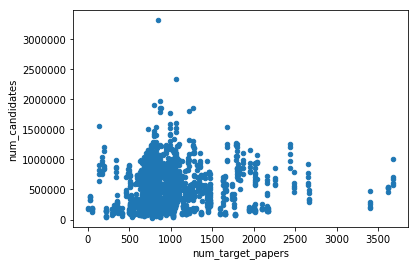

In [23]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates')

(0, 1000000.0)

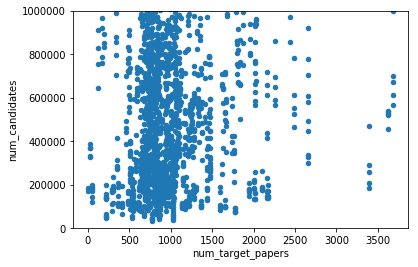

In [24]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates').set_ylim(0,1e6)

In [25]:
top_results.corr()

,review_paper_id,random_seed,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,time_fit,time_predict,mag_EF,num_entries
review_paper_id,1.000000,0.001282,0.013413,0.016467,0.017464,NaN,-0.020320,-0.006357,0.020716,0.013426,-0.042767,-0.033360
random_seed,0.001282,1.000000,0.003554,0.005149,0.005245,NaN,0.000101,0.036648,0.021456,0.035328,-0.002580,-0.004038
num_correctly_predicted,0.013413,0.003554,1.000000,0.605694,0.611011,NaN,0.562020,-0.006397,-0.000028,0.006436,0.031009,-0.114978
num_target_papers,0.016467,0.005149,0.605694,1.000000,0.997053,NaN,-0.180647,0.089914,0.122527,0.099053,-0.068271,0.053467
num_target_in_candidates,0.017464,0.005245,0.611011,0.997053,1.000000,NaN,-0.177054,0.094697,0.127277,0.104083,-0.071831,0.055772
num_seed_papers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_correctly_predicted,-0.020320,0.000101,0.562020,-0.180647,-0.177054,NaN,1.000000,-0.116554,-0.129502,-0.106622,0.161943,-0.215045
num_candidates,-0.006357,0.036648,-0.006397,0.089914,0.094697,NaN,-0.116554,1.000000,0.790112,0.927955,-0.036434,0.021176
time_fit,0.020716,0.021456,-0.000028,0.122527,0.127277,NaN,-0.129502,0.790112,1.000000,0.874303,-0.062000,0.053025
time_predict,0.013426,0.035328,0.006436,0.099053,0.104083,NaN,-0.106622,0.927955,0.874303,1.000000,-0.060607,0.050536


In [26]:
num_target_not_in_candidate = top_results.num_target_papers - top_results.num_target_in_candidates
num_target_not_in_candidate.value_counts().sort_index()

0      512
1      367
2      251
3      130
4      112
5       75
6       32
7       32
8       14
9       26
10       7
11       6
12       5
13      11
14       4
15       2
17       5
18       1
21       1
22       1
23       6
24       3
25       4
26       3
40       1
41       1
42       2
43       1
60       2
61       1
63       1
64       1
155      2
157      3
160      4
165      1
193      1
195      2
196      2
615      1
620      2
623      1
625      1
dtype: int64

In [27]:
def get_subj_ext_first(subj_ext):
    if pd.notnull(subj_ext):
        split = subj_ext.split('; ')
        return split[0]
    return None
top_results['subject_extended_first'] = top_results.subject_extended.apply(get_subj_ext_first)

In [28]:
top_results.subject_extended_first.value_counts()

Chemistry                                     528
Physiology                                    184
Physics                                       165
Biochemistry & Molecular Biology              141
Pharmacology & Pharmacy                       103
Neurosciences & Neurology                      88
Materials Science                              63
Microbiology                                   60
Thermodynamics                                 25
Endocrinology & Metabolism                     20
Cardiovascular System & Cardiology             20
Polymer Science                                15
General & Internal Medicine                    15
Environmental Sciences & Ecology               15
Engineering                                    13
Spectroscopy                                   10
Oncology                                       10
Life Sciences & Biomedicine - Other Topics     10
Energy & Fuels                                 10
Astronomy & Astrophysics                       10


In [29]:
top_results[top_results.subject_extended_first=='Computer Science'][['review_paper_id', 'num_target_papers', 'score_correctly_predicted', 'num_candidates', 'wos_title', 'wos_title_source', 'subject_extended']]

,review_paper_id,num_target_papers,score_correctly_predicted,num_candidates,wos_title,wos_title_source,subject_extended
582,2076063813,871,0.328358,1242706,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
865,2076063813,871,0.281286,1783277,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
934,2076063813,871,0.267509,1969753,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
966,2076063813,871,0.260620,1005705,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1012,2076063813,871,0.251435,1845636,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science


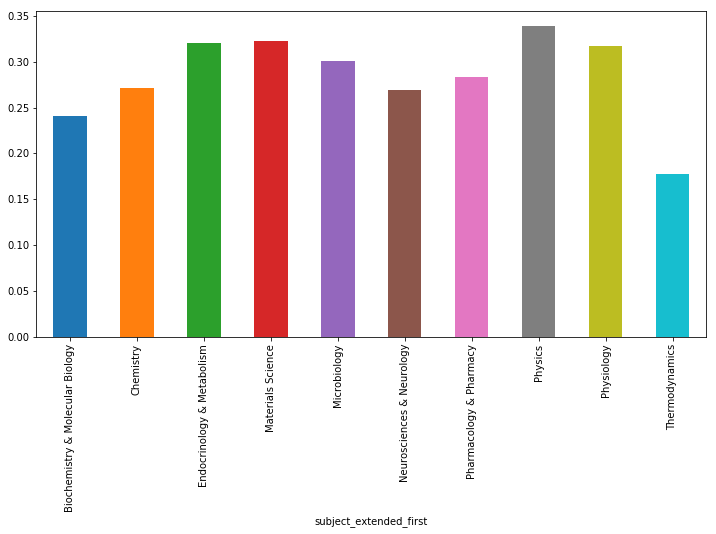

In [30]:
top10 = top_results.subject_extended_first.value_counts()[:10].index
x = top_results[top_results.subject_extended_first.isin(top10)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gbmean.plot.bar()

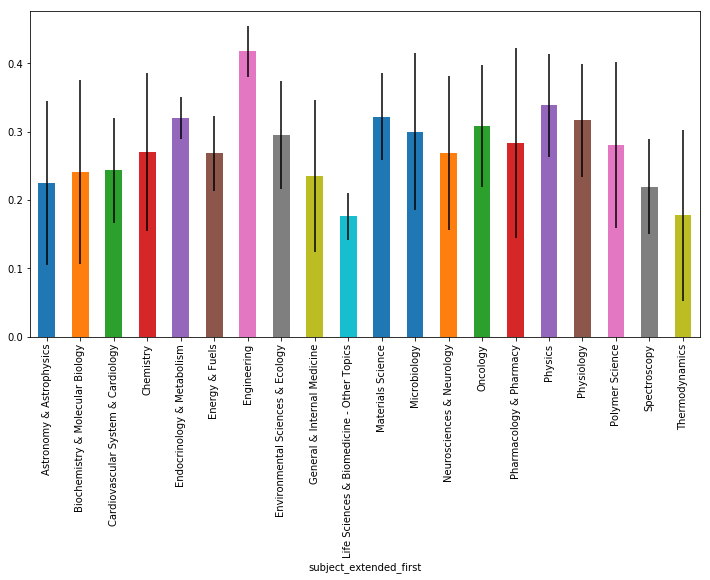

In [31]:
top20 = top_results.subject_extended_first.value_counts()[:20].index
x = top_results[top_results.subject_extended_first.isin(top20)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gberrs = gb['score_correctly_predicted'].std()
gbmean.plot.bar(yerr=gberrs)

In [32]:
top_results[top_results.num_target_papers>50].score_correctly_predicted.describe()

count    1628.000000
mean        0.283438
std         0.113810
min         0.028846
25%         0.195808
50%         0.291013
75%         0.357814
max         0.789264
Name: score_correctly_predicted, dtype: float64